# Scheme Comparison — Monochromatic Wave Propagation

This notebook comapres the performance of the following schemes for the linear wave propagation problem:

- **Conservative Staggered Scheme** with 2nd order spatial and temporal discretization
- **HLLC Scheme** with 2nd order spatial and temporal discretization
- **HLL Scheme** with 2nd order spatial and temporal discretization
- **Central-Upwind Scheme** with 2nd order spatial and temporal discretization

## Imports

First, we need to set the working directory to the main WavePropError directory to import the `scripts` module.

We import `plotly.io as pio` to save the interactive Plotly plot as an HTML file. The `IPython.display.IFrame` is used to display this HTML file within the documentation, making the interactive plot accessible directly from the Sphinx-generated documentation.

In [1]:
import os
maindir = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
os.chdir(maindir)

from scripts import *
import plotly.io as pio
from IPython.display import IFrame

## User input

We define the wave parameters and numerical settings for the model runs, which will be used consistently across all schemes.

### Wave parameters

In [2]:
wave_amplitude = 0.5e-2 # wave amplitude in m, small amplitude assumption
wave_period = 2 # wave period in s
water_depth = 1 # water depth in m

wave_length = wavelength_nwogu(wave_period, water_depth) # wave length in m computed using Nwogu's dispersion relation
print('Wave length: {:.2f}'.format(wave_length))

Wave length: 5.20


### Numerical settings


We define the key dimensionless parameters that control the spatial and temporal resolution of the wave simulation:

- **`points_per_wl`**: Number of grid points per wavelength.  
    $$
    \texttt{points_per_wl} = \frac{\lambda}{\Delta x}
    $$

- **`domain_wl`**: Domain length in terms of the number of wavelengths.  
    $$
    \texttt{domain_wl} = \frac{L}{\lambda}
    $$

- **`duration_tp`**: Simulation time in number of wave periods.  
    $$
    \texttt{duration_tp} = \frac{T_{sim}}{T}
    $$


where:
- $\lambda$ is the wavelength,
- $\Delta x$ is the grid spacing,
- $L$ is the domain length
- $T_{sim}$ is the simulation time,
- $T$ is the wave period.

In [3]:
points_per_wl = 35      
domain_wl  = 20   
duration_tp = 40    

courant_number = 0.5 # courant number
order_recon = 2 # order of reconstruction
order_rk = 2 # order of Runge-Kutta time integration

grid_size = wave_length / points_per_wl
domain_size = wave_length * domain_wl 
run_time = wave_period * duration_tp
print('Grid size: {:.2f} m'.format(grid_size))
print('Domain size: {:.2f} m'.format(domain_size))
print('Simulation time: {:.2f} s'.format(run_time))

Grid size: 0.15 m
Domain size: 104.09 m
Simulation time: 80.00 s


## Model runs

We use the function `run_model` from the `scripts` module to run the model. For more details on the function, please refer to the `scripts` module documentation.

### Conservative Staggered Scheme

In [4]:
ds_stagg = run_sine_wave(
    name_run="Conservative_Stagg",
    scheme=conservative_staggered,
    order_reconstruction=order_recon,
    order_time_integration=order_rk,
    courant_number=courant_number,
    grid_size=grid_size,
    domain_size=domain_size,
    water_depth=water_depth,
    wave_amplitude=wave_amplitude,
    wave_period=wave_period,
    run_time=run_time,
    output_interval=1,
    gauges_locations=[],
    gauges_dt=1,
)

Running Conservative_Stagg...

Input parameters
----------------
Numerical scheme :conservative_staggered
Order of reconstruction :2
Order of RK time integration :2
Courant number :0.5
Grid spacing :0.148694 m
Length of the domain :104.086 m
Water depth :1 m
Total computation time :80 s
Time step for the output :1 s
Time step for the gauges :1 s
frequency [Hz]           amplitude [m]            phase [rad]              
0.5                      0.005                    0                        

Computation Progress:    
100% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||]

The numerical simulation took 3.20938 s


Reading Conservative_Stagg results and converting to xarray.Dataset...
Done!


### HLL (Harten-Lax-van Leer) scheme

In [5]:
ds_hll = run_sine_wave(
    name_run="HLL",
    scheme=hll,
    order_reconstruction=order_recon,
    order_time_integration=order_rk,
    courant_number=courant_number,
    grid_size=grid_size,
    domain_size=domain_size,
    water_depth=water_depth,
    wave_amplitude=wave_amplitude,
    wave_period=wave_period,
    run_time=run_time,
    output_interval=1,
    gauges_locations=[],
    gauges_dt=1,
)

Running HLL...

Input parameters
----------------
Numerical scheme :hll
Order of reconstruction :2
Order of RK time integration :2
Courant number :0.5
Grid spacing :0.148694 m
Length of the domain :104.086 m
Water depth :1 m
Total computation time :80 s
Time step for the output :1 s
Time step for the gauges :1 s
frequency [Hz]           amplitude [m]            phase [rad]              
0.5                      0.005                    0                        

Computation Progress:    
100% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||]

The numerical simulation took 5.57981 s


Reading HLL results and converting to xarray.Dataset...
Done!


### HLLC (Harten-Lax-van Leer Contact) scheme

In [6]:
ds_hllc = run_sine_wave(
    name_run="HLLC",
    scheme=hllc,
    order_reconstruction=order_recon,
    order_time_integration=order_rk,
    courant_number=courant_number,
    grid_size=grid_size,
    domain_size=domain_size,
    water_depth=water_depth,
    wave_amplitude=wave_amplitude,
    wave_period=wave_period,
    run_time=run_time,
    output_interval=1,
    gauges_locations=[],
    gauges_dt=1,
)

Running HLLC...

Input parameters
----------------
Numerical scheme :hllc
Order of reconstruction :2
Order of RK time integration :2
Courant number :0.5
Grid spacing :0.148694 m
Length of the domain :104.086 m
Water depth :1 m
Total computation time :80 s
Time step for the output :1 s
Time step for the gauges :1 s
frequency [Hz]           amplitude [m]            phase [rad]              
0.5                      0.005                    0                        

Computation Progress:    
100% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||]

The numerical simulation took 4.7008 s


Reading HLLC results and converting to xarray.Dataset...
Done!


### Central Upwind Scheme

In [7]:
ds_cu = run_sine_wave(
    name_run="Central_Upwind",
    scheme=central_upwind,
    order_reconstruction=order_recon,
    order_time_integration=order_rk,
    courant_number=courant_number,
    grid_size=grid_size,
    domain_size=domain_size,
    water_depth=water_depth,
    wave_amplitude=wave_amplitude,
    wave_period=wave_period,
    run_time=run_time,
    output_interval=1,
    gauges_locations=[],
    gauges_dt=1,
)

Running Central_Upwind...

Input parameters
----------------
Numerical scheme :central_upwind
Order of reconstruction :2
Order of RK time integration :2
Courant number :0.5
Grid spacing :0.148694 m
Length of the domain :104.086 m
Water depth :1 m
Total computation time :80 s
Time step for the output :1 s
Time step for the gauges :1 s
frequency [Hz]           amplitude [m]            phase [rad]              
0.5                      0.005                    0                        

Computation Progress:    
100% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||]

The numerical simulation took 3.97216 s


Reading Central_Upwind results and converting to xarray.Dataset...
Done!


## Exact Solution

The function `exact_solution` computes the exact solution of the linear wave propgation based on Nwogu's equation. For more details on the function, please refer to the `scripts` module documentation.

In [8]:
ds_exact = sine_wave_exact_solution(
    water_depth=water_depth,
    wave_amplitude=wave_amplitude,
    wave_period=wave_period,
    time=ds_hll.time.values,
    x=ds_hll.x,
    time_gauges=ds_hll.time_gauges.values,
    index_gauges=ds_hll.index_gauges.values,
)

## Plotting

### Full animation

We create an interactive plot using Plotly to visualize the results of the model runs. The user can click on the legend to toggle the visibility of each scheme's results and zoom in/out on the plot.

The animation embedded in the Sphix-generated documentation may appear glitchy initially. To fix this, click "Stop," then go back to the beginning and play again. This issue does not occur when the script is run locally.

In [9]:
fig = create_animation_plotly([ds_hll, ds_hllc, ds_cu, ds_stagg], ds_exact)

# Additional formatting of the fig object
fig.update_layout(yaxis_range=[-0.01, 0.01])
fig.update_layout(
    legend=dict(
        orientation="h",        
        yanchor="bottom",
        y=1.0,             
        xanchor="center",
        x=0.5
    ),
)

pio.write_html(fig, file="docs/source/_static/test1_sine_wave.html", auto_open=False)


In [10]:
IFrame(src="../_static/test1_sine_wave.html", width='100%', height='500px')

### Figure of the final time step

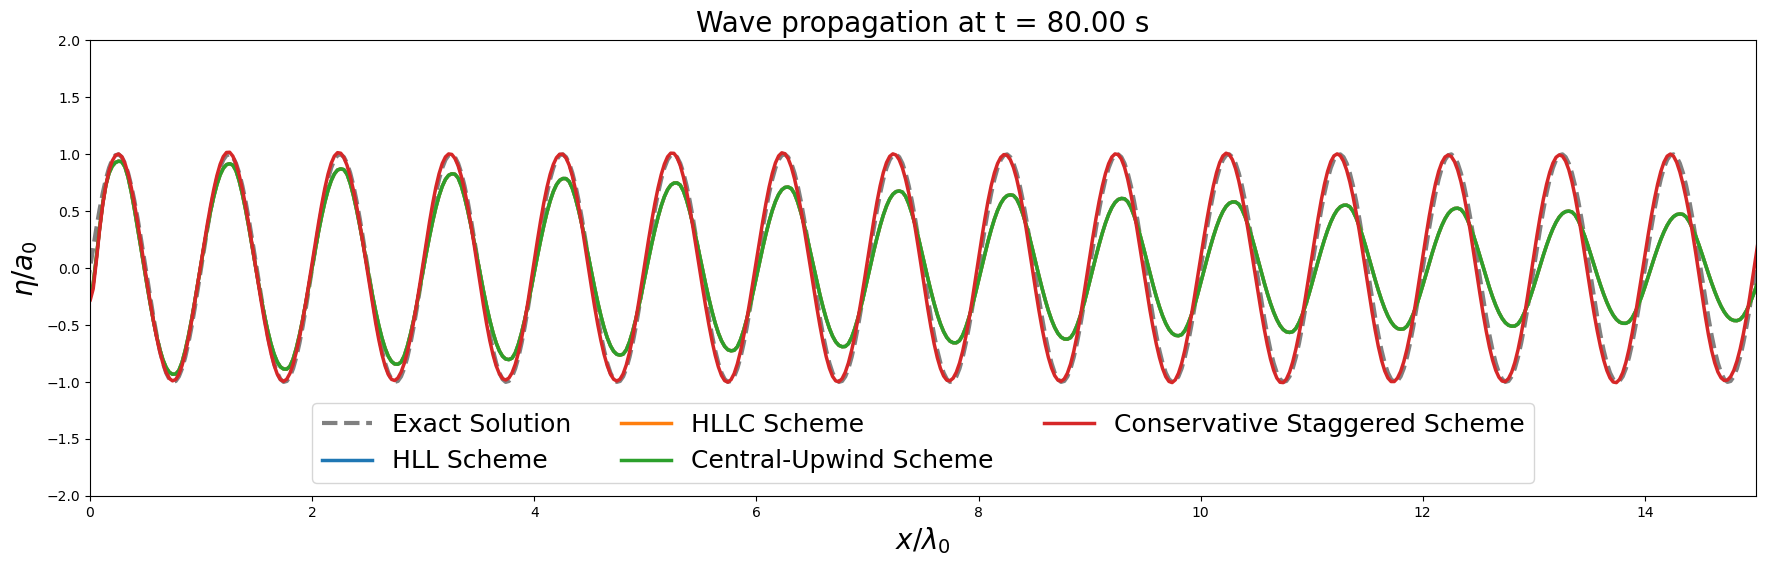

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(18, 6), sharex=True)
plt.rcParams.update({'font.size': 18})

plt.plot(ds_exact.x/wave_length, ds_exact.eta.isel(time=-1)/wave_amplitude, label="Exact Solution", linestyle="--", color="grey", linewidth=3)

plt.plot(ds_hll.x/wave_length, ds_hll.eta.isel(time=-1)/wave_amplitude, label="HLL Scheme", linewidth=2.5)
plt.plot(ds_hllc.x/wave_length, ds_hllc.eta.isel(time=-1)/wave_amplitude, label="HLLC Scheme", linewidth=2.5)
plt.plot(ds_cu.x/wave_length, ds_cu.eta.isel(time=-1)/wave_amplitude, label="Central-Upwind Scheme", linewidth=2.5)
plt.plot(ds_stagg.x/wave_length, ds_stagg.eta.isel(time=-1)/wave_amplitude, label="Conservative Staggered Scheme", linewidth=2.5)

plt.xlim([0, 15])
plt.ylim([-2, 2])

plt.xlabel(r"$x / \lambda_0$", fontsize=20)
plt.ylabel(r"$\eta / a_0$", fontsize=20)

plt.legend(loc='lower center', ncol=3, fontsize=18)

plt.title("Wave propagation at t = {:.2f} s".format(ds_hll.time[-1].values), fontsize=20)

plt.tight_layout()

plt.show()